## Reddit r/worldnews: Neural Network Models

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import datetime
import re

import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import tensorflow as tf
import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,Conv1D,LSTM,MaxPooling1D,GRU
from keras.layers.embeddings import Embedding
from keras.layers import SpatialDropout1D,SpatialDropout2D
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Concatenate,Input
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from numpy import array,asarray,zeros
from keras.callbacks import Callback,EarlyStopping,ModelCheckpoint
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from numpy import array,asarray,zeros
from keras.optimizers import SGD,Adam
from keras.layers import BatchNormalization
from keras import backend as K 
from keras.models import load_model
import unicodedata
import random
import string

# from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer,MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer,ColumnTransformer

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,f1_score,precision_score,recall_score, roc_auc_score,classification_report,confusion_matrix,average_precision_score,precision_recall_curve,plot_precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


Bad key "text.kerning_factor" on line 4 in
/home/ubuntu/anaconda3/envs/tensorflow_p37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Using TensorFlow backend.


In [2]:
# import cleaned dataframe
comments_final = pd.read_pickle('data/comments_final_.pkl')

In [3]:
y = comments_final['Removed'].to_numpy()

I compare performance between default and pretrained embeddings using neural network (NN) and convolutional neural network (CNN) models.

### Default Embeddings: Keras Embedding Layer

In [34]:
# import custom metrics
from src.model_nn_metrics import *

# call an instance of metrics
metrics = Metrics()

In [84]:
Y = comments_final['Removed']

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 100000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 300
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(comments_final['body_clean_stop'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 148677 unique tokens.


In [85]:
X = tokenizer.texts_to_sequences(comments_final['body_clean_stop'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (778732, 300)


In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, stratify=y, random_state = 0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(622985, 300) (622985,)
(155747, 300) (155747,)


### Neural Network: Default Embeddings

In [40]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# opt = SGD(lr=0.001)
# opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',fbeta])
es = EarlyStopping(monitor='val_fbeta', mode='max', verbose=1,patience=5)  
checkpoints = SaveEveryEpoch('models/best_nn_def_emb.h5')
mc = ModelCheckpoint('models/best_nn_def_emb.h5', monitor='val_fbeta', mode='max', save_best_only=True,verbose=1)  

epochs = 20
batch_size = 128

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_test, Y_test),callbacks=[mc,checkpoints,es,metrics])
#Save train log to .csv
# pd.DataFrame(history.history).to_csv('models/best_nn_def_emb_hist.csv', index=False)

# model.save('2021-01-11_models/models/best_nn_def_emb_test')

Train on 622985 samples, validate on 155747 samples
Epoch 1/20
622985/622985 [==============================] - 31s 51us/step - loss: 0.1233 - acc: 0.9698 - fbeta: 0.0559 - val_loss: 0.1167 - val_acc: 0.9701 - val_fbeta: 0.0910

Epoch 00001: val_fbeta improved from -inf to 0.09098, saving model to models/best_nn_def_emb.h5
0.969798630785653
val_f1: [0.98480603 0.12556391]  val_precision: [0.9713669  0.61623616]  val_recall: [0.99862223 0.06990373]
Epoch 2/20
622985/622985 [==============================] - 30s 48us/step - loss: 0.0962 - acc: 0.9725 - fbeta: 0.2000 - val_loss: 0.1252 - val_acc: 0.9698 - val_fbeta: 0.1260

Epoch 00002: val_fbeta improved from 0.09098 to 0.12597, saving model to models/best_nn_def_emb.h5
0.9724792731767218
val_f1: [0.98459596 0.17801047]  val_precision: [0.97242805 0.53571429]  val_recall: [0.99707225 0.10673922]
Epoch 3/20
622985/622985 [==============================] - 30s 48us/step - loss: 0.0660 - acc: 0.9803 - fbeta: 0.4744 - val_loss: 0.1652 - val_

Accuracy: 0.953579
Precision: 0.210302
Recall: 0.186270
F1 score: 0.197558
F1 score: [0.97609791 0.19755827]
F1 score weighted: 0.952213902534773
Precision score weighted: 0.9509000876587527
Recall score weighted: 0.9535785601006761


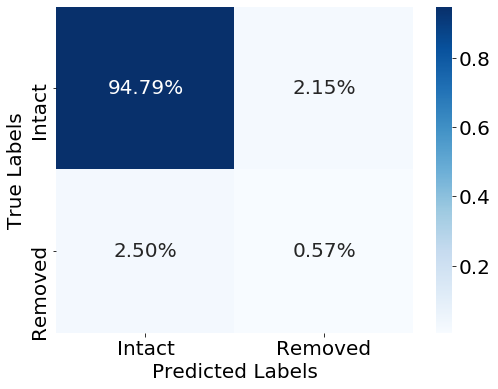

In [31]:
model = load_model('models/best_nn_def_emb.h5',custom_objects = {'fbeta':fbeta})

# predict probabilities for test set
yhat_probs = model.predict(x=X_test, verbose=0)
# predict crisp classes for test set
# yhat_classes = model.predict_classes(x=[X1_test,X2_test], verbose=0)
# max_idx = np.argmax(yhat_probs,axis=1)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_probs[yhat_probs>=0.5] = 1
yhat_probs[yhat_probs<0.5] = 0
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, yhat_probs)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, yhat_probs)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, yhat_probs)
print('F1 score: %f' % f1)
f1_all = f1_score(Y_test, yhat_probs,average=None)
print(f'F1 score: {f1_all}')
f1_w = f1_score(Y_test, yhat_probs,average='weighted')
print(f'F1 score weighted: {f1_w}')
precision_w = precision_score(Y_test, yhat_probs,average='weighted')
print(f'Precision score weighted: {precision_w}')
recall_w = recall_score(Y_test, yhat_probs,average='weighted')
print(f'Recall score weighted: {recall_w}')

plot_confusion_matrix(Y_test,yhat_probs)

### CNN

Train on 622985 samples, validate on 155747 samples
Epoch 1/20
622985/622985 [==============================] - 40s 65us/step - loss: 0.1188 - acc: 0.9704 - fbeta: 0.1023 - val_loss: 0.1108 - val_acc: 0.9707 - val_fbeta: 0.1282

Epoch 00001: val_fbeta improved from -inf to 0.12823, saving model to models/best_cnn_def_emb_v2.h5
0.9703716782908096
val_f1: [0.98507736 0.18233924]  val_precision: [0.97244775 0.63229814]  val_recall: [0.99803933 0.10652993]
Epoch 2/20
622985/622985 [==============================] - 37s 59us/step - loss: 0.0986 - acc: 0.9723 - fbeta: 0.2077 - val_loss: 0.1146 - val_acc: 0.9705 - val_fbeta: 0.1407

Epoch 00002: val_fbeta improved from 0.12823 to 0.14070, saving model to models/best_cnn_def_emb_v2.h5
0.9723203608434546
val_f1: [0.98494954 0.20521679]  val_precision: [0.9729604  0.58753709]  val_recall: [0.99723784 0.1243198 ]
Epoch 3/20
622985/622985 [==============================] - 37s 59us/step - loss: 0.0729 - acc: 0.9782 - fbeta: 0.4241 - val_loss: 0.13

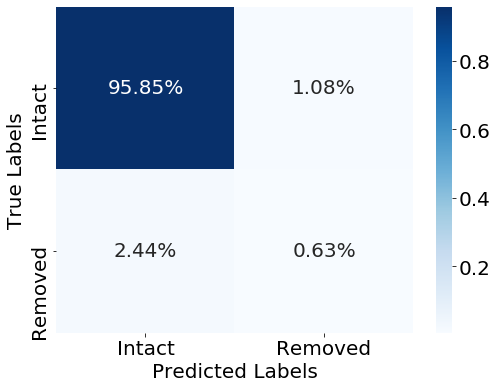

In [32]:
MAX_NB_WORDS = 100000
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',fbeta])
es = EarlyStopping(monitor='val_fbeta', mode='max', verbose=1,patience=5)  
checkpoints = SaveEveryEpoch('models/best_cnn_def_emb_v2.h5')
mc = ModelCheckpoint('models/best_cnn_def_emb_v2.h5', monitor='val_fbeta', mode='max', save_best_only=True,verbose=1)  

epochs = 20
batch_size = 128

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_test, Y_test),callbacks=[mc,checkpoints,es,metrics])
#Save train log to .csv
# pd.DataFrame(history.history).to_csv('models/best_nn_def_emb_hist.csv', index=False)

# model.save('2021-01-11_models/models/best_nn_def_emb_test')

model = load_model('models/best_cnn_def_emb_v2.h5',custom_objects = {'fbeta':fbeta})

# predict probabilities for test set
yhat_probs = model.predict(x=X_test, verbose=0)

yhat_probs = yhat_probs[:, 0]
yhat_probs[yhat_probs>=0.5] = 1
yhat_probs[yhat_probs<0.5] = 0
 
# accuracy
accuracy = accuracy_score(Y_test, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision 
precision = precision_score(Y_test, yhat_probs)
print('Precision: %f' % precision)
# recall
recall = recall_score(Y_test, yhat_probs)
print('Recall: %f' % recall)
# f1
f1 = f1_score(Y_test, yhat_probs)
print('F1 score: %f' % f1)
f1_all = f1_score(Y_test, yhat_probs,average=None)
print(f'F1 score: {f1_all}')
f1_w = f1_score(Y_test, yhat_probs,average='weighted')
print(f'F1 score weighted: {f1_w}')
precision_w = precision_score(Y_test, yhat_probs,average='weighted')
print(f'Precision score weighted: {precision_w}')
recall_w = recall_score(Y_test, yhat_probs,average='weighted')
print(f'Recall score weighted: {recall_w}')

plot_confusion_matrix(Y_test,yhat_probs)

Train on 622985 samples, validate on 155747 samples
Epoch 1/20
622985/622985 [==============================] - 42s 67us/step - loss: 0.1186 - acc: 0.9703 - fbeta: 0.1009 - val_loss: 0.1110 - val_acc: 0.9708 - val_fbeta: 0.1115

Epoch 00001: val_fbeta improved from -inf to 0.11151, saving model to models/best_cnn_def_emb_test.h5
0.9702898143615015
val_f1: [0.98511686 0.16314532]  val_precision: [0.97205349 0.66766917]  val_recall: [0.99853612 0.09292591]
Epoch 2/20
622985/622985 [==============================] - 39s 63us/step - loss: 0.0985 - acc: 0.9722 - fbeta: 0.2028 - val_loss: 0.1127 - val_acc: 0.9710 - val_fbeta: 0.1428

Epoch 00002: val_fbeta improved from 0.11151 to 0.14275, saving model to models/best_cnn_def_emb_test.h5
0.9722368917390621
val_f1: [0.98521948 0.20506507]  val_precision: [0.97290734 0.64207048]  val_recall: [0.99784724 0.12201758]
Epoch 3/20
622985/622985 [==============================] - 39s 63us/step - loss: 0.0736 - acc: 0.9778 - fbeta: 0.4094 - val_loss: 

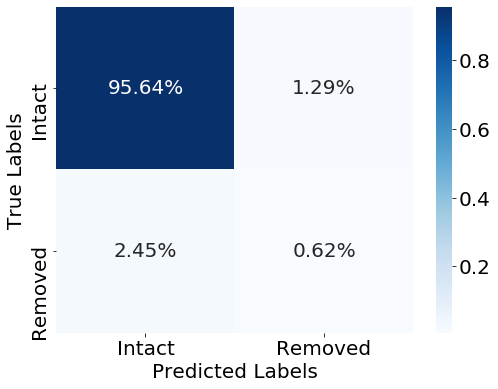

In [87]:
MAX_NB_WORDS = 100000
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',fbeta])
es = EarlyStopping(monitor='val_fbeta', mode='max', verbose=1,patience=5)  
checkpoints = SaveEveryEpoch('models/best_cnn_def_emb_test.h5')
mc = ModelCheckpoint('models/best_cnn_def_emb_test.h5', monitor='val_fbeta', mode='max', save_best_only=True,verbose=1)  

epochs = 20
batch_size = 128

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_test, Y_test),callbacks=[mc,checkpoints,es,metrics])
#Save train log to .csv
# pd.DataFrame(history.history).to_csv('models/best_nn_def_emb_hist.csv', index=False)

# model.save('2021-01-11_models/models/best_nn_def_emb_test')

model = load_model('models/best_cnn_def_emb_test.h5',custom_objects = {'fbeta':fbeta})

# predict probabilities for test set
yhat_probs = model.predict(x=X_test, verbose=0)

yhat_probs = yhat_probs[:, 0]
yhat_probs[yhat_probs>=0.5] = 1
yhat_probs[yhat_probs<0.5] = 0
 
# accuracy
accuracy = accuracy_score(Y_test, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision 
precision = precision_score(Y_test, yhat_probs)
print('Precision: %f' % precision)
# recall
recall = recall_score(Y_test, yhat_probs)
print('Recall: %f' % recall)
# f1
f1 = f1_score(Y_test, yhat_probs)
print('F1 score: %f' % f1)
f1_all = f1_score(Y_test, yhat_probs,average=None)
print(f'F1 score: {f1_all}')
f1_w = f1_score(Y_test, yhat_probs,average='weighted')
print(f'F1 score weighted: {f1_w}')
precision_w = precision_score(Y_test, yhat_probs,average='weighted')
print(f'Precision score weighted: {precision_w}')
recall_w = recall_score(Y_test, yhat_probs,average='weighted')
print(f'Recall score weighted: {recall_w}')

plot_confusion_matrix(Y_test,yhat_probs)

### Non-text & Text Features: Default Embedding Layer
Now I incorporate non-textual features into my models.

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(comments_final,Y, test_size = 0.20, stratify=y, random_state = 0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(622985, 27) (622985,)
(155747, 27) (155747,)


In [73]:
tokenizer = Tokenizer(num_words=100000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X_train['body_clean_stop'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 131274 unique tokens.


In [74]:
X1_train = tokenizer.texts_to_sequences(X_train['body_clean_stop'].values)
X1_train = pad_sequences(X1_train, maxlen=MAX_SEQUENCE_LENGTH)
X1_test = tokenizer.texts_to_sequences(X_test['body_clean_stop'].values)
X1_test = pad_sequences(X1_test, maxlen=MAX_SEQUENCE_LENGTH)
# print('Shape of data tensor:', X1.shape)

In [75]:
X2_train = X_train[['run_prop_prev_rem','child_rem_flag','sec_child_rem_flag','third_child_rem_flag', 'fourth_child_rem_flag','fifth_child_rem_flag','run_prev_rem','run_prev_tot']].values
X2_test = X_test[['run_prop_prev_rem','child_rem_flag','sec_child_rem_flag','third_child_rem_flag', 'fourth_child_rem_flag','fifth_child_rem_flag','run_prev_rem','run_prev_tot']].values

In [76]:
# normalize non-text features
scaler = MinMaxScaler()

X2_train_s = scaler.fit_transform(X2_train)
X2_test_s = scaler.transform(X2_test)

### Neural Network: Default Embeddings, Non-text, 1 Layer, Default Parameters

In [79]:
# opt = Adam(lr=0.005)
input_1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_2 = Input(shape=(8,))
embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=300, trainable=False)(input_1)
layer_1 = Flatten()(embedding_layer)
concat_layer = Concatenate()([layer_1, input_2])
dense_layer = Dense(128, activation='relu')(concat_layer)
dense_layer2 = Dense(64, activation='relu')(dense_layer)
output = Dense(1, activation='sigmoid')(dense_layer2)
model = Model(inputs=[input_1, input_2], outputs=output)

keras.callbacks.Callback()


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',fbeta])
print(model.summary())
es = EarlyStopping(monitor='val_fbeta', mode='max', verbose=1,patience=5)  
checkpoints = SaveEveryEpoch('models/best_nn_def_emb_nontext.h5')
mc = ModelCheckpoint('models/best_nn_def_emb_nontext.h5', monitor='val_fbeta', mode='max', save_best_only=True,verbose=1)  

history = model.fit(x=[X1_train, X2_train_s], y=Y_train, validation_data=([X1_test,X2_test_s],Y_test), nb_epoch=20, batch_size=128, verbose=1, callbacks=[es,mc,checkpoints])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 300, 100)     10000000    input_11[0][0]                   
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 30000)        0           embedding_13[0][0]               
__________________________________________________________________________________________________
input_12 (InputLayer)           (None, 8)            0                                            
__________________________________________________________________________________________________
concatenat

Accuracy: 0.975357
Precision: 0.761402
Recall: 0.286522
F1 score: 0.416363
F1 score: [0.98741301 0.41636253]
F1 score weighted: 0.9698943465126867
Precision score weighted: 0.9712159133568475
Recall score weighted: 0.9753574707699024


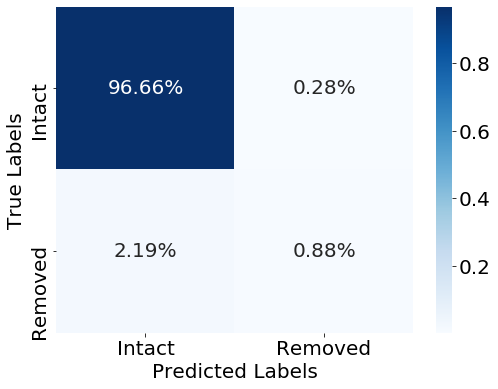

In [80]:
model = load_model('models/best_nn_def_emb_nontext.h5',custom_objects = {'fbeta':fbeta})

# predict probabilities for test set
yhat_probs = model.predict(x=[X1_test,X2_test_s], verbose=0)
# predict crisp classes for test set
# yhat_classes = model.predict_classes(x=[X1_test,X2_test], verbose=0)
# max_idx = np.argmax(yhat_probs,axis=1)
# predict probabilities for test set

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_probs[yhat_probs>=0.5] = 1
yhat_probs[yhat_probs<0.5] = 0
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, yhat_probs)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, yhat_probs)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, yhat_probs)
print('F1 score: %f' % f1)
f1_all = f1_score(Y_test, yhat_probs,average=None)
print(f'F1 score: {f1_all}')
f1_w = f1_score(Y_test, yhat_probs,average='weighted')
print(f'F1 score weighted: {f1_w}')
precision_w = precision_score(Y_test, yhat_probs,average='weighted')
print(f'Precision score weighted: {precision_w}')
recall_w = recall_score(Y_test, yhat_probs,average='weighted')
print(f'Recall score weighted: {recall_w}')

plot_confusion_matrix(Y_test,yhat_probs)

### CNN: Default Embeddings, Non-text, 1 Layer, Default Parameters

In [81]:
input_1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
input_2 = Input(shape=(8,))
embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1], trainable=False)(input_1)
Conv_1 = Conv1D(128, 5, activation='relu')(embedding_layer)
Conv_2 = GlobalMaxPooling1D()(Conv_1)
concat_layer = Concatenate()([Conv_2, input_2])

dense_layer = Dense(128, activation='relu')(concat_layer)
dense_layer2 = Dense(64, activation='relu')(dense_layer)
output = Dense(1, activation='sigmoid')(dense_layer2)
model = Model(inputs=[input_1, input_2], outputs=output)

keras.callbacks.Callback()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',fbeta])
print(model.summary())
es = EarlyStopping(monitor='val_fbeta', mode='max', verbose=1,patience=5)  
checkpoints = SaveEveryEpoch('models/best_cnn_def_emb_nontext.h5')
mc = ModelCheckpoint('models/best_cnn_def_emb_nontext.h5', monitor='val_fbeta', mode='max', save_best_only=True,verbose=1)  

history = model.fit(x=[X1_train, X2_train_s], y=Y_train, validation_data=([X1_test,X2_test_s],Y_test), nb_epoch=20, batch_size=128, verbose=1, callbacks=[es,mc,checkpoints])

Accuracy: 0.972834
Precision: 0.600515
Recall: 0.341984
F1 score: 0.435791
[0.98608201 0.43579144]
0.9692002166957455
Precision score weighted: 0.9678293675796422
Recall score weighted: 0.972834147688238


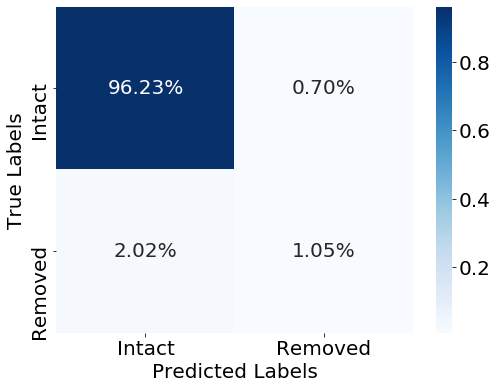

In [82]:
model = load_model('models/best_cnn_def_emb_nontext_test.h5',custom_objects = {'fbeta':fbeta})

# predict probabilities for test set
yhat_probs = model.predict(x=[X1_test,X2_test_s], verbose=0)

# get 1d array
yhat_probs = yhat_probs[:, 0]
yhat_probs[yhat_probs>0.5] = 1
yhat_probs[yhat_probs<0.5] = 0
 
accuracy = accuracy_score(Y_test, yhat_probs)
print('Accuracy: %f' % accuracy)

precision = precision_score(Y_test, yhat_probs)
print('Precision: %f' % precision)

recall = recall_score(Y_test, yhat_probs)
print('Recall: %f' % recall)

f1 = f1_score(Y_test, yhat_probs)
print('F1 score: %f' % f1)

f1_both = f1_score(Y_test,yhat_probs,average=None)
print(f1_both)

f1_w = f1_score(Y_test,yhat_probs,average='weighted')
print(f1_w)

precision_w = precision_score(Y_test, yhat_probs,average='weighted')
print(f'Precision score weighted: {precision_w}')

recall_w = recall_score(Y_test, yhat_probs,average='weighted')
print(f'Recall score weighted: {recall_w}')


plot_confusion_matrix(Y_test,yhat_probs)

## Transfer Learning: Word2Vec Pretrained Embeddings

In [33]:
y = comments_final['Removed'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
     comments_final,y, test_size = 0.2, random_state = 0, stratify = y)

In [34]:
#train_test split
x_tr, y_tr = X_train['body_clean_stop'].values, y_train
x_val, y_val = X_test['body_clean_stop'].values, y_test

In [35]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#Tokenize the sentences
tokenizer = Tokenizer(num_words=100000)

#preparing vocabulary
tokenizer.fit_on_texts(list(x_tr))

#converting text into integer sequences
x_tr_seq  = tokenizer.texts_to_sequences(x_tr) 
x_val_seq = tokenizer.texts_to_sequences(x_val)

#padding to prepare sequences of same length
x_tr_seq  = pad_sequences(x_tr_seq, maxlen=300)
x_val_seq = pad_sequences(x_val_seq, maxlen=300)

In [38]:
# load the whole embedding into memory
# https://wikipedia2vec.github.io/wikipedia2vec/pretrained/
w2v_embeddings_index = dict()
f = open('data/enwiki_20180420_300d.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    w2v_embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(w2v_embeddings_index))

Loaded 4529833 word vectors.


In [39]:
size_of_vocabulary=len(tokenizer.word_index) + 1 #+1 for padding

# create a weight matrix for words in training docs
w2v_embedding_matrix = np.zeros((size_of_vocabulary, 300))

for word, i in tokenizer.word_index.items():
    w2v_embedding_vector = w2v_embeddings_index.get(word)
    if w2v_embedding_vector is not None:
        w2v_embedding_matrix[i] = w2v_embedding_vector
print(size_of_vocabulary)

131275


In [40]:
w2v_embedding_matrix.shape

(131275, 300)

## W2V Pretrained: Text only

### NN: Pretrained Wiki Embeddings, Text-only, 1 Layer, Default Parameters

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 300, 300)          39382500  
_________________________________________________________________
flatten_2 (Flatten)          (None, 90000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               11520128  
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 50,902,757
Trainable params: 11,520,257
Non-trainable params: 39,382,500
_________________________________________________________________
None
Train on 622985 samples, validate on 155747 samples
Epoch 1/20
622985/622985 [==============================] - 31s 50us/step - loss: 0.1306 - acc: 0.9692 - fbeta: 0.0191 - val_loss: 0.1271 - val_acc: 0.9693 - val_fbeta: 0.0148

Epoch 00001: val_fb

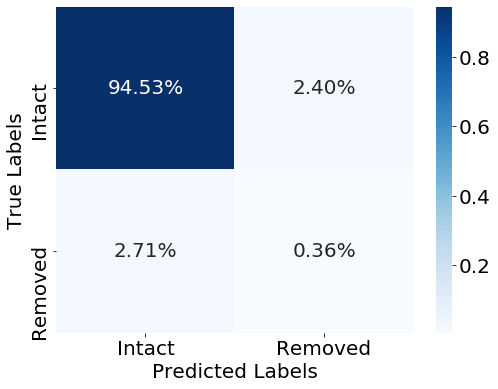

In [43]:
model = Sequential()
embedding_layer = Embedding(size_of_vocabulary, 300, weights=[w2v_embedding_matrix], input_length=300, trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',fbeta])

#Adding callbacks
es = EarlyStopping(monitor='val_fbeta', mode='max', verbose=1,patience=5)
checkpoints = SaveEveryEpoch('models/best_nn_pretr_emb.h5')
mc=ModelCheckpoint('models/best_nn_pretr_emb.h5', monitor='val_fbeta', mode='max', save_best_only=True,verbose=1)  

#Print summary of model
print(model.summary())

# fit model
history = model.fit(np.array(x_tr_seq),np.array(y_tr),batch_size=128,epochs=20,validation_data=(np.array(x_val_seq),np.array(y_val)),verbose=1,callbacks=[mc,checkpoints,es])


model = load_model('models/best_nn_pretr_emb.h5',custom_objects = {'fbeta':fbeta})

# predict probabilities for test set
yhat_probs = model.predict(x=np.array(x_val_seq), verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_probs[yhat_probs>0.5] = 1
yhat_probs[yhat_probs<0.5] = 0
 
accuracy = accuracy_score(Y_test, yhat_probs)
print('Accuracy: %f' % accuracy)

precision = precision_score(Y_test, yhat_probs)
print('Precision: %f' % precision)

recall = recall_score(Y_test, yhat_probs)
print('Recall: %f' % recall)

f1 = f1_score(Y_test, yhat_probs)
print('F1 score: %f' % f1)

f1_both = f1_score(Y_test,yhat_probs,average=None)
print(f1_both)

f1_w = f1_score(Y_test,yhat_probs,average='weighted')
print(f1_w)

precision_w = precision_score(Y_test, yhat_probs,average='weighted')
print(f'Precision score weighted: {precision_w}')

recall_w = recall_score(Y_test, yhat_probs,average='weighted')
print(f'Recall score weighted: {recall_w}')

plot_confusion_matrix(Y_test,yhat_probs)

### CNN: Pretrained Wiki Embeddings, Text-only, 1 Layer, Default Parameters

In [89]:
# define and fit the model
# def cnn_model(trainX, trainy):

model = Sequential()
embedding_layer = Embedding(size_of_vocabulary, 300, weights=[w2v_embedding_matrix], input_length=300, trainable=False)
model.add(embedding_layer)
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',fbeta])


#Adding callbacks
es = EarlyStopping(monitor='val_fbeta', mode='max', verbose=1,patience=5)
checkpoints = SaveEveryEpoch('models/best_cnn_pretr_emb.h5')
mc=ModelCheckpoint('models/best_cnn_pretr_emb.h5', monitor='val_fbeta', mode='max', save_best_only=True,verbose=1)  

#Print summary of model
print(model.summary())

# fit model
history = model.fit(np.array(x_tr_seq),np.array(y_tr),batch_size=128,epochs=20,validation_data=(np.array(x_val_seq),np.array(y_val)),verbose=1,callbacks=[mc,checkpoints,es])


model = load_model('models/best_cnn_pretr_emb.h5',custom_objects = {'fbeta':fbeta})

# predict probabilities for test set
yhat_probs = model.predict(x=np.array(x_val_seq), verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_probs[yhat_probs>0.5] = 1
yhat_probs[yhat_probs<0.5] = 0
 
accuracy = accuracy_score(Y_test, yhat_probs)
print('Accuracy: %f' % accuracy)

precision = precision_score(Y_test, yhat_probs)
print('Precision: %f' % precision)

recall = recall_score(Y_test, yhat_probs)
print('Recall: %f' % recall)

f1 = f1_score(Y_test, yhat_probs)
print('F1 score: %f' % f1)

f1_both = f1_score(Y_test,yhat_probs,average=None)
print(f1_both)

f1_w = f1_score(Y_test,yhat_probs,average='weighted')
print(f1_w)

plot_confusion_matrix(Y_test,yhat_probs)

Accuracy: 0.967723
Precision: 0.433600
Recall: 0.170155
F1 score: 0.244401
[0.98350944 0.24440102]
0.9608350988277176
Precision score weighted: 0.957646348245937
Recall score weighted: 0.9677232948307191


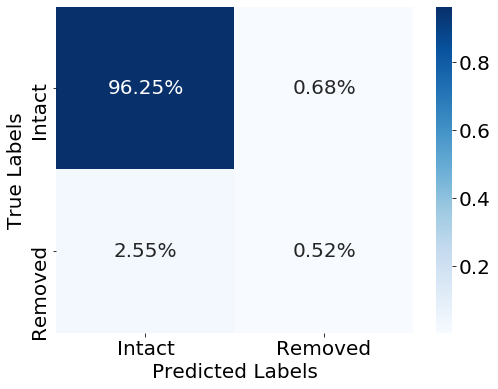

In [88]:

model = load_model('models/best_cnn_pretr_emb.h5',custom_objects = {'fbeta':fbeta})

# predict probabilities for test set
yhat_probs = model.predict(x=np.array(x_val_seq), verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_probs[yhat_probs>0.5] = 1
yhat_probs[yhat_probs<0.5] = 0
 
accuracy = accuracy_score(Y_test, yhat_probs)
print('Accuracy: %f' % accuracy)

precision = precision_score(Y_test, yhat_probs)
print('Precision: %f' % precision)

recall = recall_score(Y_test, yhat_probs)
print('Recall: %f' % recall)

f1 = f1_score(Y_test, yhat_probs)
print('F1 score: %f' % f1)

f1_both = f1_score(Y_test,yhat_probs,average=None)
print(f1_both)

f1_w = f1_score(Y_test,yhat_probs,average='weighted')
print(f1_w)

precision_w = precision_score(Y_test, yhat_probs,average='weighted')
print(f'Precision score weighted: {precision_w}')

recall_w = recall_score(Y_test, yhat_probs,average='weighted')
print(f'Recall score weighted: {recall_w}')

plot_confusion_matrix(Y_test,yhat_probs)

### Pretrained w2v: Text + Non-text features (Wikipedia)


In [ ]:
comments_final.columns

In [47]:
final_features = ['body_clean_stop','run_prop_prev_rem','child_rem_flag','sec_child_rem_flag','third_child_rem_flag', 'fourth_child_rem_flag','fifth_child_rem_flag','run_prev_rem','run_prev_tot']
X = comments_final[final_features]

y = comments_final['Removed']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [49]:
X1_train = X_train['body_clean_stop']
X1_test = X_test['body_clean_stop']

In [50]:
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(X1_train)

X1_train = tokenizer.texts_to_sequences(X1_train)
X1_test = tokenizer.texts_to_sequences(X1_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X1_train = pad_sequences(X1_train, padding='post', maxlen=maxlen)
X1_test = pad_sequences(X1_test, padding='post', maxlen=maxlen)

In [51]:
X2_train = X_train[['run_prop_prev_rem','child_rem_flag','sec_child_rem_flag','third_child_rem_flag', 'fourth_child_rem_flag','fifth_child_rem_flag','run_prev_rem','run_prev_tot']].values
X2_test = X_test[['run_prop_prev_rem','child_rem_flag','sec_child_rem_flag','third_child_rem_flag', 'fourth_child_rem_flag','fifth_child_rem_flag','run_prev_rem','run_prev_tot']].values

In [52]:
# normalize non-text features
scaler = MinMaxScaler()

X2_train_s = scaler.fit_transform(X2_train)
X2_test_s = scaler.transform(X2_test)

#### NN: Non-text features + Pretrained w2v embeddings

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 200, 300)     39382500    input_1[0][0]                    
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 60000)        0           embedding_8[0][0]                
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 8)            0                                            
__________________________________________________________________________________________________
concatenat

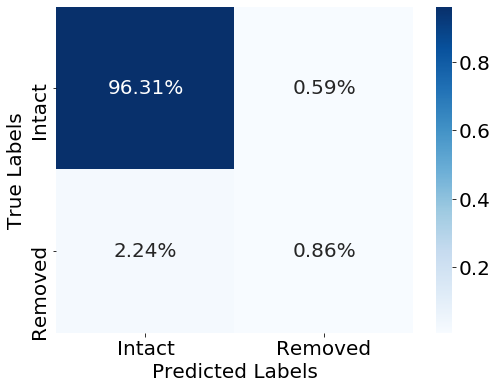

In [54]:
input_1 = Input(shape=(maxlen,))
input_2 = Input(shape=(8,))
embedding_layer = Embedding(size_of_vocabulary, 300, weights=[w2v_embedding_matrix], trainable=False)(input_1)
flatten = Flatten()(embedding_layer)
concat_layer = Concatenate()([flatten,input_2])
dense_layer = Dense(128, activation='relu')(concat_layer)
dense_layer2 = Dense(64, activation='relu')(dense_layer)
output = Dense(1, activation='sigmoid')(dense_layer2)
model = Model(inputs=[input_1, input_2], outputs=output)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',fbeta])
print(model.summary())
es = EarlyStopping(monitor='val_fbeta', mode='max', verbose=1,patience=5)  
checkpoints = SaveEveryEpoch('models/best_nn_w2v_emb_nontext_v2.h5')
mc = ModelCheckpoint('models/best_nn_w2v_emb_nontext_v2.h5', monitor='val_fbeta', mode='max', save_best_only=True,verbose=1)  


history = model.fit(x=[X1_train, X2_train_s], y=y_train, validation_data=([X1_test,X2_test_s],y_test), nb_epoch=20, batch_size=128, verbose=1,callbacks=[es,mc,checkpoints])


model = load_model('models/best_nn_w2v_emb_nontext_v2.h5',custom_objects = {'fbeta':fbeta})

# predict probabilities for test set
yhat_probs = model.predict(x=[X1_test,X2_test_s], verbose=0)
# predict crisp classes for test set
# yhat_classes = model.predict_classes(x=[X1_test,X2_test], verbose=0)
# max_idx = np.argmax(yhat_probs,axis=1)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_probs[yhat_probs>0.5] = 1
yhat_probs[yhat_probs<0.5] = 0
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_probs)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_probs)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_probs)

print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_probs)
print('F1 score: %f' % f1)


f1_both = f1_score(y_test,yhat_probs,average=None)
print(f1_both)

precision_w = precision_score(y_test,yhat_probs,average='weighted')
print(precision_w)

recall_w = recall_score(y_test,yhat_probs,average='weighted')
print(recall_w)

f1_w = f1_score(y_test,yhat_probs,average='weighted')
print(f1_w)

plot_confusion_matrix(y_test,yhat_probs)

#### CNN: Non-text features + Pretrained w2v embeddings


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_18 (Embedding)        (None, 200, 300)     39382500    input_17[0][0]                   
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 196, 128)     192128      embedding_18[0][0]               
__________________________________________________________________________________________________
global_max_pooling1d_9 (GlobalM (None, 128)          0           conv1d_9[0][0]                   
__________________________________________________________________________________________________
input_18 (

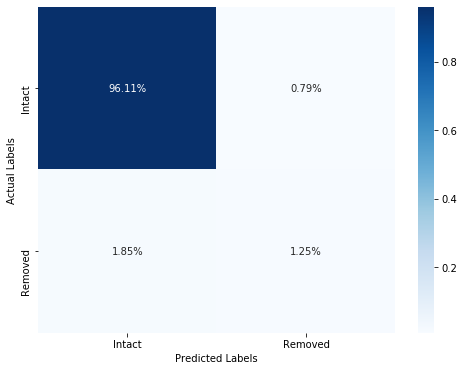

In [96]:
input_1 = Input(shape=(maxlen,))
input_2 = Input(shape=(8,))
embedding_layer = Embedding(size_of_vocabulary, 300, weights=[w2v_embedding_matrix], trainable=False)(input_1)
Conv_1 = Conv1D(128, 5, activation='relu')(embedding_layer)
Conv_2 = GlobalMaxPooling1D()(Conv_1)
concat_layer = Concatenate()([Conv_2, input_2])
# dense_layer_1 = Dense(10, activation='relu')(input_2)
# dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
# concat_layer = Concatenate()([Conv_2, dense_layer_2])
dense_layer = Dense(128, activation='relu')(concat_layer)
dense_layer2 = Dense(64, activation='relu')(dense_layer)
output = Dense(1, activation='sigmoid')(dense_layer2)
model = Model(inputs=[input_1, input_2], outputs=output)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',fbeta])
print(model.summary())
es = EarlyStopping(monitor='val_fbeta', mode='max', verbose=1,patience=5)  
checkpoints = SaveEveryEpoch('models/best_cnn_w2v_emb_nontext_v2.h5')
mc = ModelCheckpoint('models/best_cnn_w2v_emb_nontext_v2.h5', monitor='val_fbeta', mode='max', save_best_only=True,verbose=1)  


history = model.fit(x=[X1_train, X2_train_s], y=y_train, validation_data=([X1_test,X2_test_s],y_test), nb_epoch=20, batch_size=128, verbose=1,callbacks=[es,mc,checkpoints])


model = load_model('models/best_cnn_w2v_emb_nontext_v2.h5',custom_objects = {'fbeta':fbeta})

# predict probabilities for test set
yhat_probs = model.predict(x=[X1_test,X2_test_s], verbose=0)
# predict crisp classes for test set
# yhat_classes = model.predict_classes(x=[X1_test,X2_test], verbose=0)
# max_idx = np.argmax(yhat_probs,axis=1)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_probs[yhat_probs>0.5] = 1
yhat_probs[yhat_probs<0.5] = 0
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_probs)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_probs)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_probs)

print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_probs)
print('F1 score: %f' % f1)


f1_both = f1_score(y_test,yhat_probs,average=None)
print(f1_both)

precision_w = precision_score(y_test,yhat_probs,average='weighted')
print(precision_w)

recall_w = recall_score(y_test,yhat_probs,average='weighted')
print(recall_w)

f1_w = f1_score(y_test,yhat_probs,average='weighted')
print(f1_w)

plot_confusion_matrix(y_test,yhat_probs)

Accuracy: 0.973540
Precision: 0.611583
Recall: 0.402277
F1 score: 0.485325
[0.98642116 0.48532534]
0.9696188430551742
0.9735404213243273
0.9708812644942546


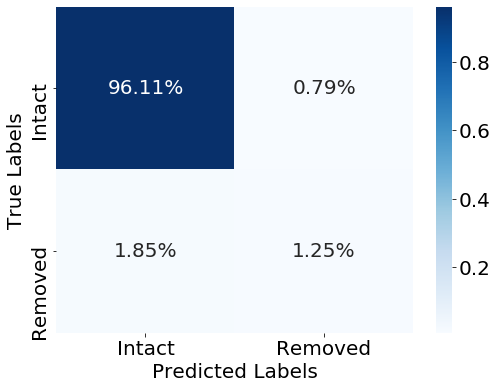

In [53]:
model = load_model('models/best_cnn_w2v_emb_nontext_v2.h5',custom_objects = {'fbeta':fbeta})

# predict probabilities for test set
yhat_probs = model.predict(x=[X1_test,X2_test_s], verbose=0)
# predict crisp classes for test set
# yhat_classes = model.predict_classes(x=[X1_test,X2_test], verbose=0)
# max_idx = np.argmax(yhat_probs,axis=1)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_probs[yhat_probs>0.5] = 1
yhat_probs[yhat_probs<0.5] = 0
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_probs)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_probs)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_probs)

print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_probs)
print('F1 score: %f' % f1)


f1_both = f1_score(y_test,yhat_probs,average=None)
print(f1_both)

precision_w = precision_score(y_test,yhat_probs,average='weighted')
print(precision_w)

recall_w = recall_score(y_test,yhat_probs,average='weighted')
print(recall_w)

f1_w = f1_score(y_test,yhat_probs,average='weighted')
print(f1_w)

plot_confusion_matrix(y_test,yhat_probs)

## Summary

For just text features, my best model is a CNN using a pretrained embedding layer, with a weighted F1 is 0.961. F1 for the positive class is 0.244. For text and non-text features, my best model is also a CNN using a pretrained embedding layer, where weighted F1 is 0.971, and F1 for the positive class is 0.485. These models outperform my "best" tf-idf model (logistic regression using unigrams, where weighted F1 is 0.971, and F1 for the positive class is 0.444.